The goal of this project is to use the publications abstracts of a laboratory to find its **research topics**.

In [1]:

import pandas as pd 
import random 
import re 

import numpy as np
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Web scrapping
from bs4 import BeautifulSoup
import requests

# Natural Language processing
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
from collections import Counter

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

# Translation module 
from google_trans_new import google_translator

from googletrans import Translator

import goslate

warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goken\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\goken\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
url = "http://lcfc.ensam.eu/annuaire-119849.kjsp?RH=4847109392611633&RF=4847109490928658"
data = requests.get(url)
soup = BeautifulSoup(data.content, "html.parser")
soup.title.text

'Laboratoire de Conception Fabrication Commande - Annuaire'

In [3]:
lines_researchers = [] # Creating lists to store scrap data 
for a in soup.find_all('h4', href=False): 
    if a.text: 
        lines_researchers.append(a.text)

In [4]:
lines_researchers

['Directeur :\xa0Pr. Ali SIADAT',
 'Directeur Adjoint : Tudor BALAN',
 'Secrétariat : Jenny MAFAYOUX',
 'ABBA Gabriel',
 'ANTOINE Jean-François',
 'BALAN Tudor',
 'BAUDOUIN Cyrille',
 'BECKER Eric',
 'BERVILLER Laurent',
 'BIGOT Régis',
 'BOEHM Daniel',
 'BONNET Nicolas',
 'BURGUN Sébastien',
 'DANTAN Jean-Yves',
 'DE PAOLIS Sylvio',
 'DURAND Camille',
 'ETIENNE Alain',
 'FENDLER Alexandre',
 'GODOT Xavier',
 'HOMRI Lazhar',
 'LAKBAKBI-ELYAAQOUBI Nafissa',
 'LANGLOIS Laurent',
 'LEONARD François',
 'MALASSE Olaf',
 'MARTIN Patrick',
 'MATHIEU Stéphane',
 'NAEGELEN Olivier',
 'RIVETTE Mickaël',
 'Jenny MAFAYOUX',
 'SIADAT Ali',
 'ZATTARIN Patrick',
 'ZIMMER CHEVRET Sandra',
 'ASLAN Fadik',
 'BOUIDA Rabeb',
 'BOURLET Clément',
 'DARDOURI Fawzia',
 'DIDI CHAOUI Mohamed',
 'ENAIM Mohammed',
 'FRANCOIS Mathieu',
 'GOKA Edoh',
 'HUANG Zhicheng',
 'JIA Bin',
 'KOLEGAIN Yves',
 'KUMAR Atal Anil',
 'MAGNANI Florian',
 'PETRONIJEVIC Jelena',
 'PONDAVEN Corentin',
 'REZAEIMALEK Mohammad',
 'STIEF

In [10]:
lines_researchers = lines_researchers[3:]

In [11]:
researchers_names = []
for element in lines_researchers:
    researchers_names.append(element.split(" "))
researchers_names

[['ABBA', 'Gabriel'],
 ['ANTOINE', 'Jean-François'],
 ['BALAN', 'Tudor'],
 ['BAUDOUIN', 'Cyrille'],
 ['BECKER', 'Eric'],
 ['BERVILLER', 'Laurent'],
 ['BIGOT', 'Régis'],
 ['BOEHM', 'Daniel'],
 ['BONNET', 'Nicolas'],
 ['BURGUN', 'Sébastien'],
 ['DANTAN', 'Jean-Yves'],
 ['DE', 'PAOLIS', 'Sylvio'],
 ['DURAND', 'Camille'],
 ['ETIENNE', 'Alain'],
 ['FENDLER', 'Alexandre'],
 ['GODOT', 'Xavier'],
 ['HOMRI', 'Lazhar'],
 ['LAKBAKBI-ELYAAQOUBI', 'Nafissa'],
 ['LANGLOIS', 'Laurent'],
 ['LEONARD', 'François'],
 ['MALASSE', 'Olaf'],
 ['MARTIN', 'Patrick'],
 ['MATHIEU', 'Stéphane'],
 ['NAEGELEN', 'Olivier'],
 ['RIVETTE', 'Mickaël'],
 ['Jenny', 'MAFAYOUX'],
 ['SIADAT', 'Ali'],
 ['ZATTARIN', 'Patrick'],
 ['ZIMMER', 'CHEVRET', 'Sandra'],
 ['ASLAN', 'Fadik'],
 ['BOUIDA', 'Rabeb'],
 ['BOURLET', 'Clément'],
 ['DARDOURI', 'Fawzia'],
 ['DIDI', 'CHAOUI', 'Mohamed'],
 ['ENAIM', 'Mohammed'],
 ['FRANCOIS', 'Mathieu'],
 ['GOKA', 'Edoh'],
 ['HUANG', 'Zhicheng'],
 ['JIA', 'Bin'],
 ['KOLEGAIN', 'Yves'],
 ['KUMAR', '

In [9]:
## Here if you just want the full professors names i.e. Ph.D. students names are not collected
## Collecting the professors' names
links_with_text = [] # Creating lists to store scrap data 
for a in soup.find_all('a', href=True): 
    if a.text: 
        links_with_text.append(a['href'])
        
names_lines = list()
for line in links_with_text : 
    if "javascript" in line: 
        names_lines.append(line)
        
professors_names = list()
for names in names_lines:
    sep = "'"
    positions =  [pos for pos, char in enumerate(names) if char == sep]
    fullName = names[positions[0]+1 : positions[1]]
    professors_names.append(fullName.split("."))

#### Adding Gabriel to the first name 
professors_names[3] = ["abba", "gabriel"]
professors_names[20] = ["Lakbakbi-Elyaaqoubi","nafissa"]
professors_names[22] = ["Leonard","François"]
del professors_names[0] # delete a duplication 

In [10]:
professors_names

[['tudor', 'balan'],
 ['jenny', 'mafayoux'],
 ['abba', 'gabriel'],
 ['jean-francois', 'antoine'],
 ['tudor', 'balan'],
 ['cyrille', 'baudouin'],
 ['eric', 'becker'],
 ['laurent', 'berviller'],
 ['regis', 'bigot'],
 ['daniel', 'boehm'],
 ['nicolas', 'bonnet'],
 ['lionel', 'simon'],
 ['jean-yves', 'dantan'],
 ['sylvio', 'depaolis'],
 ['camille', 'durand'],
 ['alain', 'etienne'],
 ['alexandre', 'fendler'],
 ['xavier', 'godot'],
 ['lazhar', 'homri'],
 ['Lakbakbi-Elyaaqoubi', 'nafissa'],
 ['laurent', 'langlois'],
 ['Leonard', 'François'],
 ['olaf', 'malasse'],
 ['patrick', 'martin'],
 ['stephane', 'mathieu'],
 ['olivier', 'naegelen'],
 ['mickael', 'rivette'],
 ['jenny', 'mafayoux'],
 ['ali', 'siadat'],
 ['patrick', 'zattarin'],
 ['sandra', 'chevret']]

In [14]:
### Scraping multiple webpages 
#for professor in professors_names:

url2 = "https://hal.archives-ouvertes.fr/search/index/?q={}+{}&page={}"
abstracts = list() ## Initializing the list to store the abstracts

for professor in researchers_names:
    
    for page in range(1,4):
    
        url_2 = url2.format(professor[0], professor[1], page)
        data_2 = requests.get(url_2)
        soup_2 = BeautifulSoup(data_2.content, "html.parser")
        # print(soup_2.title.text)
        
        containers_2 = soup_2.find_all('div', class_ = "media-body")
        
        if containers_2 is not None:
            
            webLinks = list()
            for container in containers_2:
                name_2 = container.find('a', href=True)
                webLinks.append(name_2.text)
            
            url3 = "https://hal.archives-ouvertes.fr/"
            
            
            for addressWeb in webLinks: 
                url4 = url3 + addressWeb
                # print("abstract link = ", url4)
                data_3 = requests.get(url4)
                soup_3 = BeautifulSoup(data_3.content, "html.parser")
                
                containers_3 = soup_3.find('div', class_ = "abstract-content")
                if containers_3 is not None:
                    abstracts.append(containers_3.text)
                else:
                    containers_3 = None

        else:
            containers_2 = None
        

In [15]:
len(abstracts)

585

In [18]:
abstracts

['\nAbstract : We consider the linear stochastic wave equation with spatially homogenous Gaussian noise, which is fractional in time with index $H>1/2$. We show that the necessary and sufficient condition for the existence of the solution is a relaxation of the condition obtained in \\cite{dalang99}, when the noise is white in time. Under this condition, we show that the solution is $L^2(\\Omega)$-continuous. Similar results are obtained for the heat equation. Unlike the white noise case, the necessary and sufficient condition for the existence of the solution in the case of the heat equation is {\\em different} (and more general) than the one obtained for the wave equation.                    ',
 '\nAbstract : Forging in semi-solid state significantly extends the possibilities of classical hot forging. In order to fully exploit its potential, the process requires a specific and demanding environment, penalizing its industrial deployment. In this context, an alternative route is propos

In [152]:
print(abstracts[0])

  the  presents a velocity hysteresis friction model this model can be  for simulation or control of an accurate micropositioning servomechanism the mechanical and friction parameters are identified from measured signals at low velocities and with the use of a closed loop identification method the measured signals are very noised the number of measurement samples available is very low the friction model dépends on position velocity and acceleration and includes the coulomb stribeck and viscous frictions a hystérésis effect integrated by an expntial term and the acceleration is added in the model the identified parameters are validated by applying an efficient precision method based on the sensitivity analysis of nonlinear models and a normalized mean square error criterion 


**Preprocessing the Abstracts**

In [17]:
import re

## Translating everything in English
def translateFrenchAbstractsToEnglish(myList):
    
    myList2 = myList.copy()
  
        
    for abstractIndex, abstractContent in enumerate(myList2) : 
                        
        abstractContent = re.sub(r"(\$+)(?:(?!\1)[\s\S])*\1", ' ', abstractContent) ## removing all math equations expression

        abstractContent = re.sub(r'\W+', ' ', abstractContent) ##removing stopwords
        
        abstractContent = abstractContent.lower()
        
        
        myList2[abstractIndex] = abstractContent
        
        myList2[abstractIndex] = myList2[abstractIndex].lower()
             
                               
    return myList2

In [18]:
abstracts_3 = abstracts.copy()

abstracts_4 = translateFrenchAbstractsToEnglish(abstracts_3)

In [19]:
len(abstracts_4)

585

In [20]:
abstracts_4


[' abstract the paper presents a velocity hysteresis friction model this model can be used for simulation or control of an accurate micropositioning servomechanism the mechanical and friction parameters are identified from measured signals at low velocities and with the use of a closed loop identification method the measured signals are very noised the number of measurement samples available is very low the friction model dépends on position velocity and acceleration and includes the coulomb stribeck and viscous frictions a hystérésis effect integrated by an exponential term and the acceleration is added in the model the identified parameters are validated by applying an efficient precision method based on the sensitivity analysis of nonlinear models and a normalized mean square error criterion ',
 ' résumé l article présente la méthodologie d obtention de trajectoires optimales de marche pour une nouvelle classe de robot bipède le robot bipède est constitué de sept corps et possède de

In [21]:
french_abstract = []
for row, abst in enumerate(abstracts_4):
    
    if "résumé" in abst:
        french_abstract.append(re.sub("résumé", "", abst))
        abstracts_4[row] =""

We have here `french_abstract` and we can translate these abstracts almost in french to english. But due to the limitations relative to the translation libraries (number of words, timeout, ...), I could not process this `french_abstract`.

In [22]:
len(abstracts_4)

585

In [23]:
abstracts_4

[' abstract the paper presents a velocity hysteresis friction model this model can be used for simulation or control of an accurate micropositioning servomechanism the mechanical and friction parameters are identified from measured signals at low velocities and with the use of a closed loop identification method the measured signals are very noised the number of measurement samples available is very low the friction model dépends on position velocity and acceleration and includes the coulomb stribeck and viscous frictions a hystérésis effect integrated by an exponential term and the acceleration is added in the model the identified parameters are validated by applying an efficient precision method based on the sensitivity analysis of nonlinear models and a normalized mean square error criterion ',
 '',
 '',
 ' abstract this paper presents the static equilibrium workspace of an under constrained cable driven robot with four cables taking into account the forces and the moments due to th

In [37]:
summaries = [ "abstract", "summary", "paper", "using", "used", "proposed", "one", "two"]

for abstractIndex, abstractContent in enumerate(abstracts_4) : 
    
    for index, summary in enumerate(summaries):

        if summary in abstractContent:

            abstracts_4[abstractIndex] = re.sub(summary, '', abstractContent)

In [38]:
abstractStudy = " ".join(abstracts_4).lower()

In [39]:
abstractStudy

'  the  presents a velocity hysteresis friction model this model can be  for simulation or control of an accurate micropositioning servomechanism the mechanical and friction parameters are identified from measured signals at low velocities and with the use of a closed loop identification method the measured signals are very noised the number of measurement samples available is very low the friction model dépends on position velocity and acceleration and includes the coulomb stribeck and viscous frictions a hystérésis effect integrated by an expntial term and the acceleration is added in the model the identified parameters are validated by applying an efficient precision method based on the sensitivity analysis of nonlinear models and a normalized mean square error criterion     abstract this  presents the static equilibrium workspace of an under constrained cable driven robot with four cables taking into account the forces and the moments due to the forces acting on the moving platform

**Creating a Word Cloud**

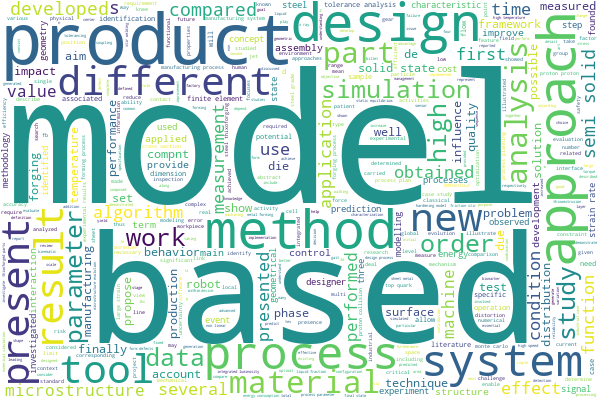

In [40]:
# WordCloud
from wordcloud import WordCloud, STOPWORDS

## Setting the Stop words
stopwords = set(STOPWORDS)

# Generate the text
text = abstractStudy

# Create a WordCloud object
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, contour_width=3,
                      contour_color='steelblue', width=600, height=400)

# Generate a word cloud
wordcloud.generate(abstractStudy)

# Visualize the word cloud
wordcloud.to_image()


**Natural Language Processing**

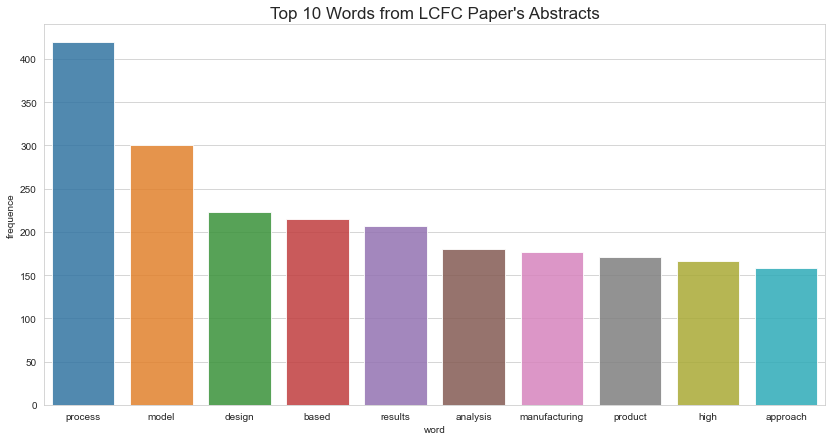

In [41]:

# Tokenize abstracts
tokens = word_tokenize(abstractStudy)

# Cleaning punctuation
exclude = set(string.punctuation)
tokens_no_punctuation = [word for word in tokens if word not in exclude]

# Load stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

# Remove stopwords
tokens_clean = [word for word in tokens_no_punctuation if word not in stopwords]

# Count most frequent words
counts = Counter(tokens_clean)
counts_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()

# Correct column names
counts_df.columns = ['word','frequence']

# Sort Values
counts_df.sort_values(by='frequence', ascending=False, inplace=True)

# Create a new dataframe with the top 10 words
top10 = counts_df.head(10)

# Plot the 10 most frequent words
plt.figure(figsize=(14,7))
sns.barplot(x='word', y= 'frequence', data=top10, alpha=0.85)
plt.title('Top 10 Words from LCFC Paper\'s Abstracts', size=17)
plt.show()

In [143]:
abs_df = pd.DataFrame(abstracts_4, columns=['text'])

In [144]:
abs_df

,text
0,the presents a velocity hysteresis friction...
1,
2,
3,abstract this presents the static equilibriu...
4,this report presents the dynamic modeling of...
...,...
580,in the current era of increased customizatio...
581,market dynamics of today are constantly evol...
582,
583,reconfigurable manufacturing systems constit...


**LDA modeling**

Latent Dirichlet allocation (LDA) is a generative statistical model in natural language processing, and
can be used to discover ‘topics’ in a large set of documents. This is first presented by David Blei,
Andrew Ng, and Michael Jordan [1].

[1] Blei, D., Ng, A., and Jordan, M. (2003). Latent Dirichlet allocation. Journal of Machine
Learning Research, 3:993–1022

In [145]:
abstracts = abs_df.text

# Remove punctuation
abstracts = abstracts.map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
abstracts = abstracts.map(lambda x: x.lower())

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(abstracts)

# Parameters
number_topics = 3
number_words = 20

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(n_components=3, n_jobs=-1)

The function below will:

* Get all the words contained in the vectorized data (abstracts);
* Create a for loop with a tuple of (topic_index, topic#) for each component from the lda model (which is an array with lists of numbers representing the words in each topic);
* Next the function will iterate over the words, selecting only those with higher frequency/ relevant to the topic;
* Present the result printed on the screen.    


In [146]:
# Function to Print each category and its words
topics_dict = {}
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_index, topic in enumerate(model.components_):
        print(f"\nTopic #{topic_index}:")
        topic_words = " , ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(topic_words)

        topics_dict["topic_{}".format(topic_index)] = [topic_words]
        
        #print(" , ".join([words[i]
         #               for i in topic.argsort()[:-n_top_words - 1:-1]]))
        


# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)


Topics found via LDA:

Topic #0:
process , model , steel , solid , forming , material , strain , semi , high , temperature , parameters , state , results , microstructure , different , work , based , parts , forging , thixoforging

Topic #1:
results , model , robot , mass , based , proton , energy , production , welding , data , algorithm , quark , presented , cms , non , high , forces , new , analysis , cross

Topic #2:
design , product , process , manufacturing , analysis , model , approach , based , new , tolerance , machine , systems , study , quality , case , order , assembly , geometrical , production , method


In [147]:
topics_dict

{'topic_0': ['process , model , steel , solid , forming , material , strain , semi , high , temperature , parameters , state , results , microstructure , different , work , based , parts , forging , thixoforging'],
 'topic_1': ['results , model , robot , mass , based , proton , energy , production , welding , data , algorithm , quark , presented , cms , non , high , forces , new , analysis , cross'],
 'topic_2': ['design , product , process , manufacturing , analysis , model , approach , based , new , tolerance , machine , systems , study , quality , case , order , assembly , geometrical , production , method']}

In [148]:
for key, item in topics_dict.items():
    topics_dict[key] = [word.split(" , ") for word in item]
    topics_dict[key] = topics_dict[key][0]

**Analyzing LDA Results**

In [ ]:
topics = {'topic0':['process' , 'design' , 'model' , 'material' , 'parts' , 'tool' , 'parameters' , 'using' , 
                    'solid' , 'manufacturing' , 'approach' , 'results' , 'different' , 'steel' , 'paper' , 
                    'welding' , 'study' , 'state' , 'forming' , 'semi'],
          'topic1':['product' , 'model' , 'based' , 'design' , 'manufacturing' , 'analysis' , 'process' , 
                    'production' , 'proposed' , 'paper' , 'new' , 'inspection' , 'quality' , 'approach' , 
                    'case' , 'study' , 'cost' , 'performance' , 'method' , 'time'],
          'topic2':['situation' , 'results' , 'work' , 'robot' , 'energy' , 'human' ,
                    'proposed' , 'present' , 'service' , 'effect' , 'study' , 'based' , 'phase' ,
                    'new' , 'multi' , 'analysis' , 'rolling' , 'oxidative' , 'single' , 'management']}

In [149]:
# Listing our topics and words


topics = topics_dict


# Function that takes a list of words and a text as input and count how many times the words in the list appear in the text
def count_words(words, text):
    counter = 0
    for word in words:
        for w in text.split():
            if word == w:
                counter+= 1
    return counter


# Function to classify each abstract in a topic by verifying the topic that has more words in it.
# For each abstract, I will create a dictionary {topic: qty words from the list} and then I will check what is the key in the dictionary
# with the highest number, wich will be the topic number to be added to a list and returned.

def assign_topic(topic, text):
    assign = []
    for row in text:
        topic_counts = {}
        for key, value in topic.items():
            topic_counts[key] = count_words(value, row) #use function previously created
        assign.append(max(topic_counts, key=lambda k: topic_counts[k]))
    return assign


# The list of topics that will go in the dataframe
topics_list = assign_topic(topics, abs_df.text)

abs_df['topics'] = topics_list

In [150]:
abs_df

,text,topics
0,the presents a velocity hysteresis friction...,topic_2
1,,topic_0
2,,topic_0
3,abstract this presents the static equilibriu...,topic_1
4,this report presents the dynamic modeling of...,topic_1
...,...,...
580,in the current era of increased customizatio...,topic_2
581,market dynamics of today are constantly evol...,topic_2
582,,topic_0
583,reconfigurable manufacturing systems constit...,topic_2


**Plotting the Pie Chart with the Topics Distribution**

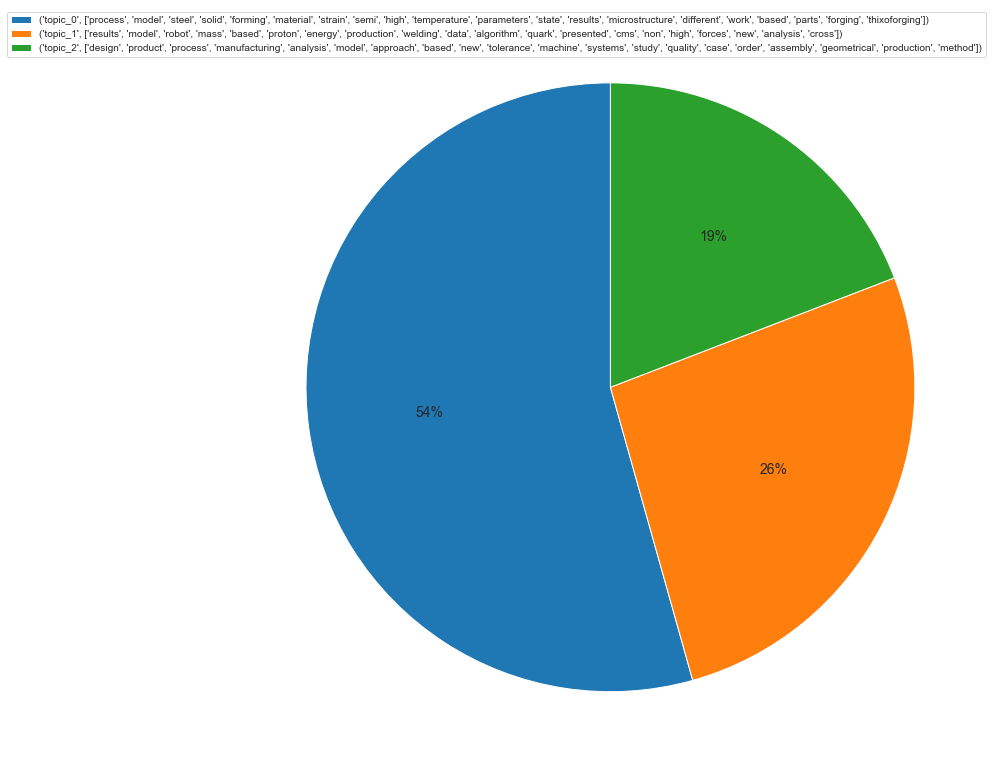

In [151]:
plt.figure(figsize=(14,14))
labels = topics.items()
sizes = abs_df.topics.value_counts()
plt.pie(sizes, autopct='%1.f%%', startangle=90, textprops={'fontsize': 14})
plt.legend(labels, loc = 'best')
plt.show()

**Analyzing the results**

Analyzing these topics shows us that:
* topic_0 : is related to the department of material science and manufacturing
* topic_1 : is related to the department of robotics and commands
* topic_2 : is related to the department of design.
Moreover, the laboratory we are studying here has officially 3 department that can be observed clearly by analyzing the unstructures data from its publications abstracts.